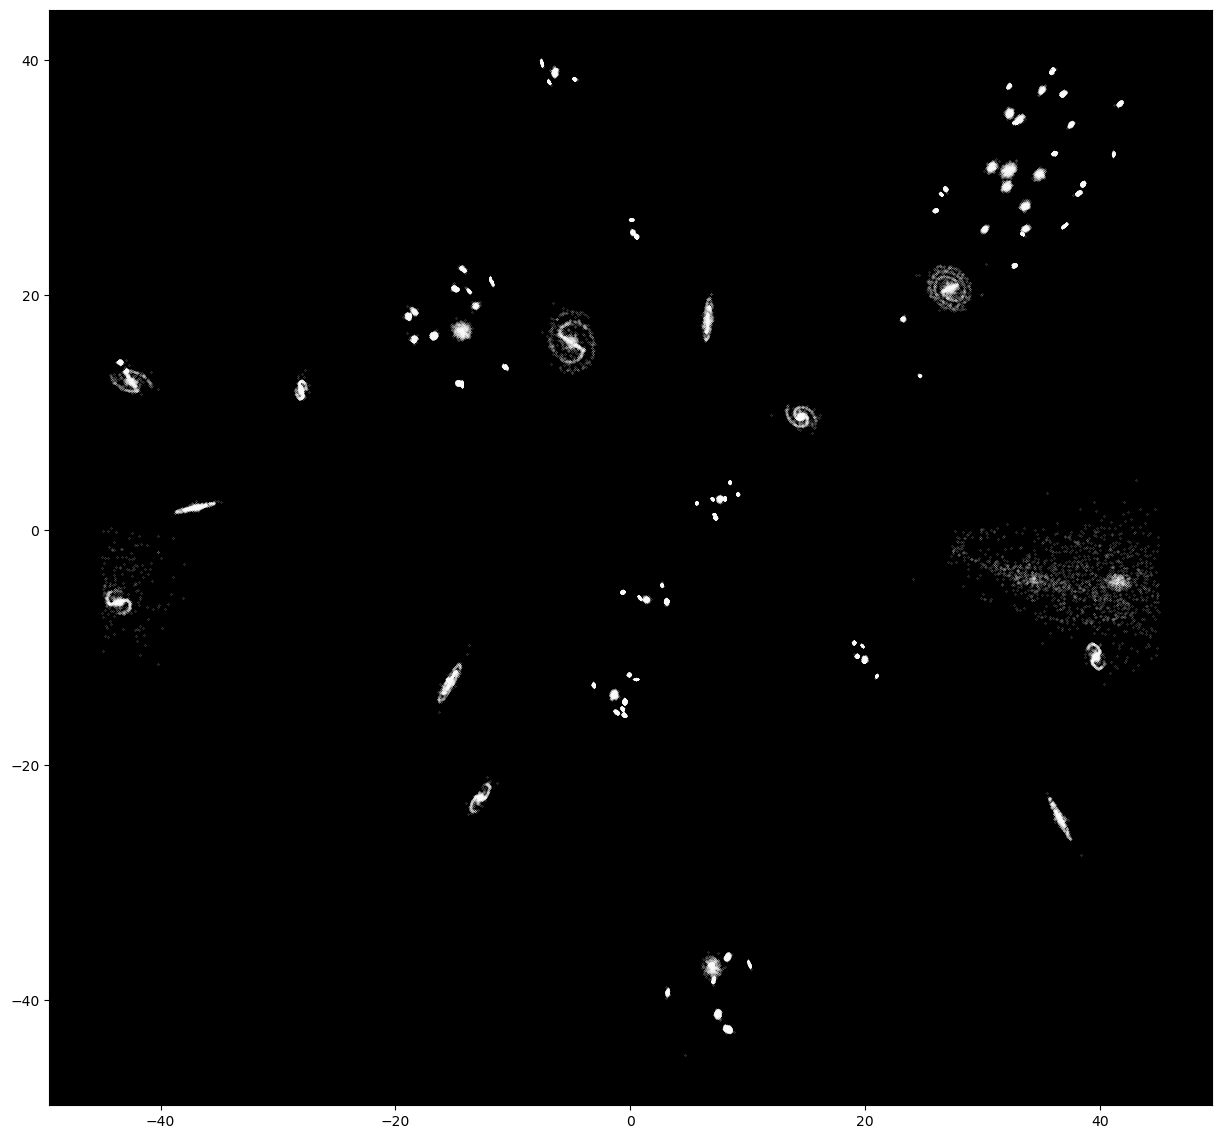

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

datapath = 'universe_8/'
stardata = pd.read_csv(datapath + '/combined_stars.csv')  

equats = stardata['X']   
polars = stardata['Y']    
parallax = stardata['Parallax']    

indexes = [i for i, x in enumerate(parallax) if x <= 0.007] 
equats = [equats[i] for i in indexes]  
polars = [polars[i] for i in indexes]

fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(equats, polars, s=0.02, c='w')  

ax.set_facecolor('k')   
ax.set_aspect(1)    
plt.show()   

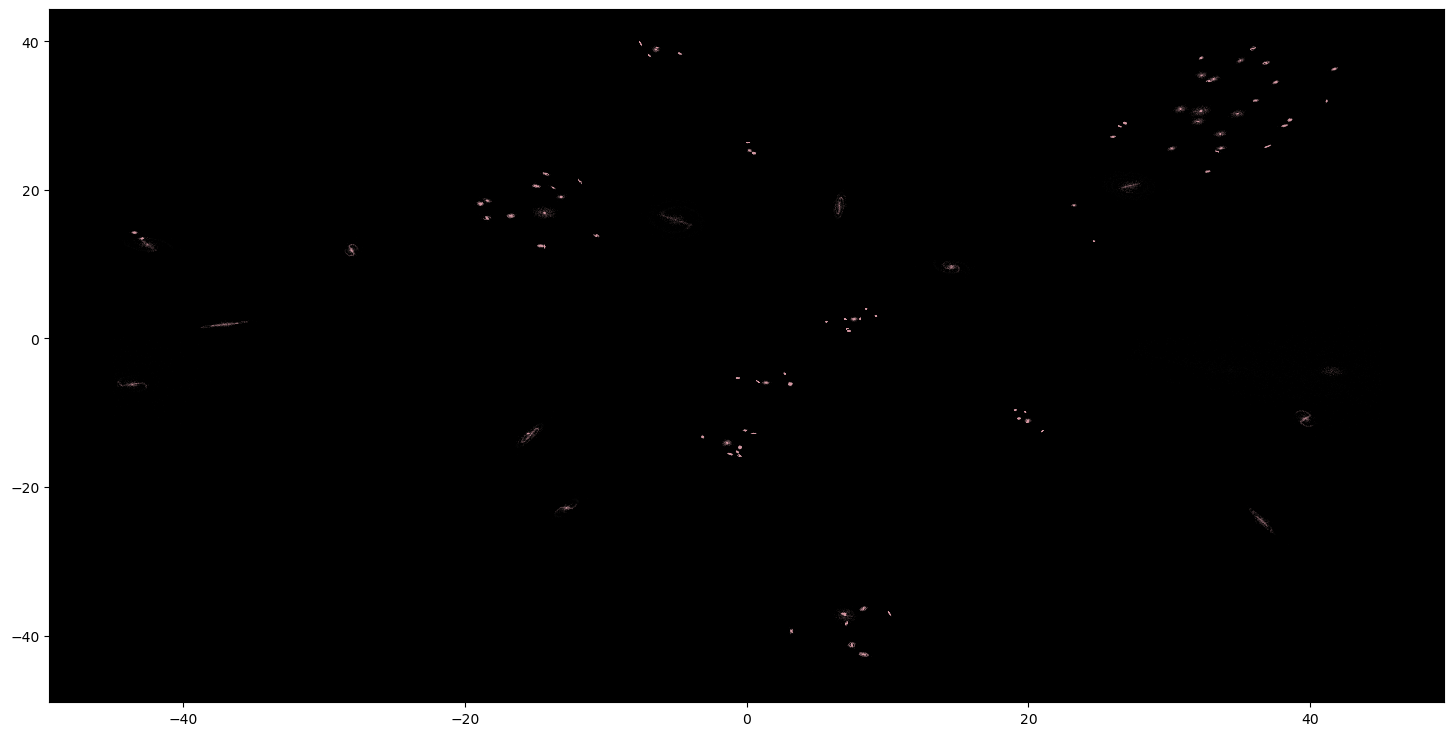

In [45]:
from sklearn import cluster
import numpy as np

coords = np.ndarray((len(equats), 2)) 
for i, equat in enumerate(equats):
    coords[i] = [equat, polars[i]] 

clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)

labels = clustering.labels_ 

fig, ax = plt.subplots(figsize=(18, 9))   

for clust in range(0, max(labels) + 1):
    
    Xk = coords[labels == clust] 
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, color= 'pink', s=0.02, linewidths=0)
    
ax.scatter(coords[labels == -1, 0], coords[labels == -1, 1], c="w", alpha=0.3, s=0.02, linewidths=0) 


ax.set_facecolor('k')
plt.show()

In [46]:
import os
directory = os.path.abspath("") + f"\\{datapath}"
newdir = directory + "\\Star Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)

for clust in range(0, max(labels) + 1):
    indices = np.where(labels == clust)  
    data = stardata.iloc[indices] 
    
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) 
    
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy' 
    data.to_csv(datapath + f'/Star Clusters/{clustername}.csv', index=None, sep=' ')    

In [21]:
positions = np.ndarray((max(labels), 3))
print(positions)
names = np.ndarray((max(labels)), dtype=object)

for clust in range(0, max(labels)):
    indices = np.where(labels == clust)  
    data = stardata.iloc[indices]
    
    Xk = coords[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1])
    meanvel = np.mean(data['RadialVelocity']) 
    positions[clust] = [xcenter, ycenter, meanvel]
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy' 
    names[clust] = clustername

[[0.00000000e+000 6.95331172e-310 9.63428009e-321]
 [            nan 9.85330622e+165 3.47572992e-143]
 [6.19941898e-071 4.47593874e-091 4.47593816e-091]
 [4.47593816e-091 4.47593816e-091 4.47593816e-091]
 [4.47593816e-091 4.47593816e-091 4.47593816e-091]
 [4.47593816e-091 1.06032943e+136 9.02193423e+217]
 [1.42137837e-076 9.48698916e+217 1.94933997e+243]
 [9.89803615e+164 6.01347002e-154 6.01347002e-154]
 [6.01347002e-154 6.01347002e-154 2.51313475e+180]
 [5.52568037e+228 6.18503820e+223 6.91119946e+212]
 [2.59027849e-144 2.95147897e-075 7.13325665e-067]
 [5.47185028e-095 1.60824317e+136 9.02193423e+217]
 [9.89803615e+164 6.12573932e-154 2.95151840e-075]
 [6.12572883e-154 2.95165399e-075 2.84185191e-052]
 [2.11571987e+257 1.38997819e+218 1.28733049e+248]
 [4.89976459e-109 9.89803615e+164 6.12573932e-154]
 [2.95152262e-075 5.96971510e+135 5.68850135e-038]
 [9.18660509e-072 1.42137878e-076 1.40176602e-076]
 [2.44048967e-152 2.66263018e-061 2.08416954e-023]
 [2.95164340e-075 2.35106216e-0

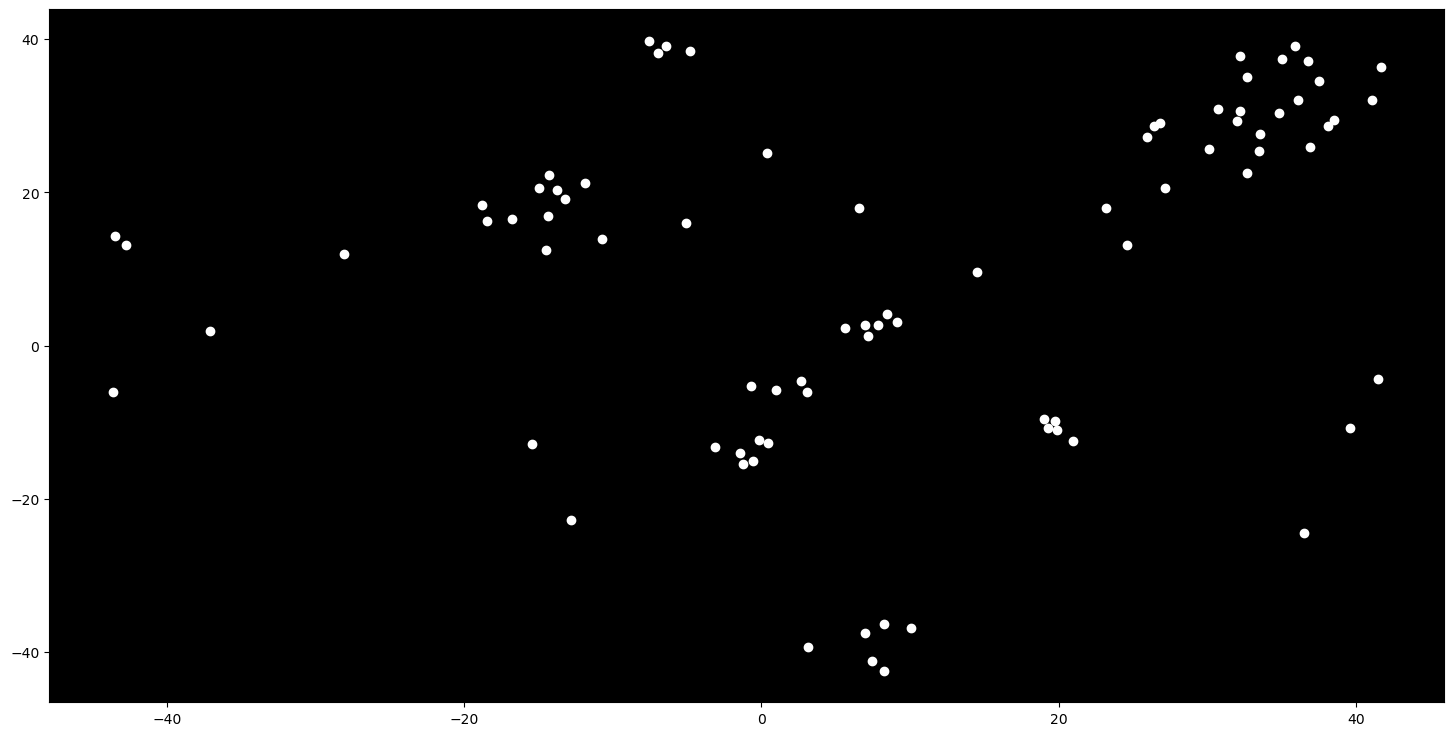

In [47]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(positions[:, 0], positions[:, 1], c='w')

ax.set_facecolor('k')


Text(0.5, 0.5, 'Radial elocity (km/s)')

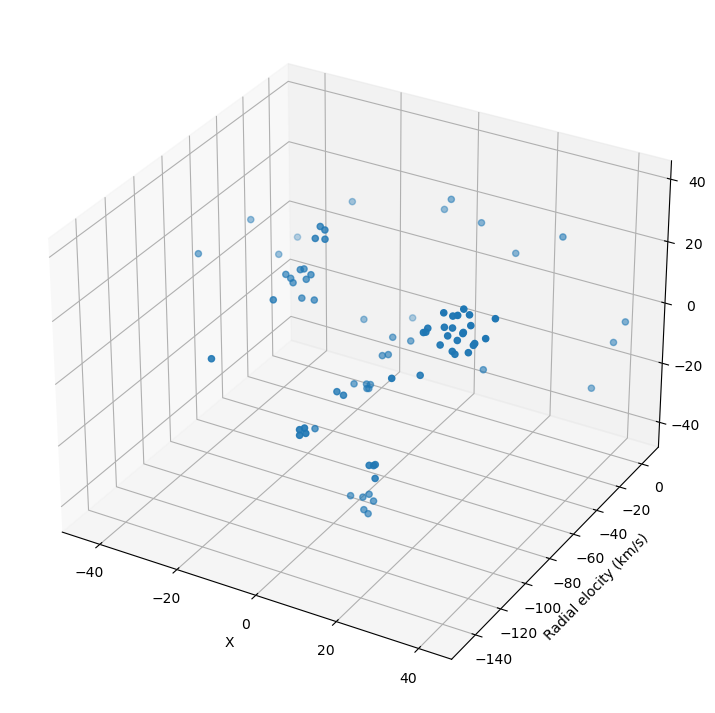

In [48]:
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(positions[:, 0], positions[:, 2], positions[:, 1])
ax.set_xlabel("X"); ax.set_zlabel("Y"); ax.set_ylabel("Radial elocity (km/s)")

In [49]:
coords = np.ndarray((len(equats), 2)) 
for i, equat in enumerate(equats):
    coords[i] = [equat, polars[i]] 

clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)

labels = clustering.labels_ 



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

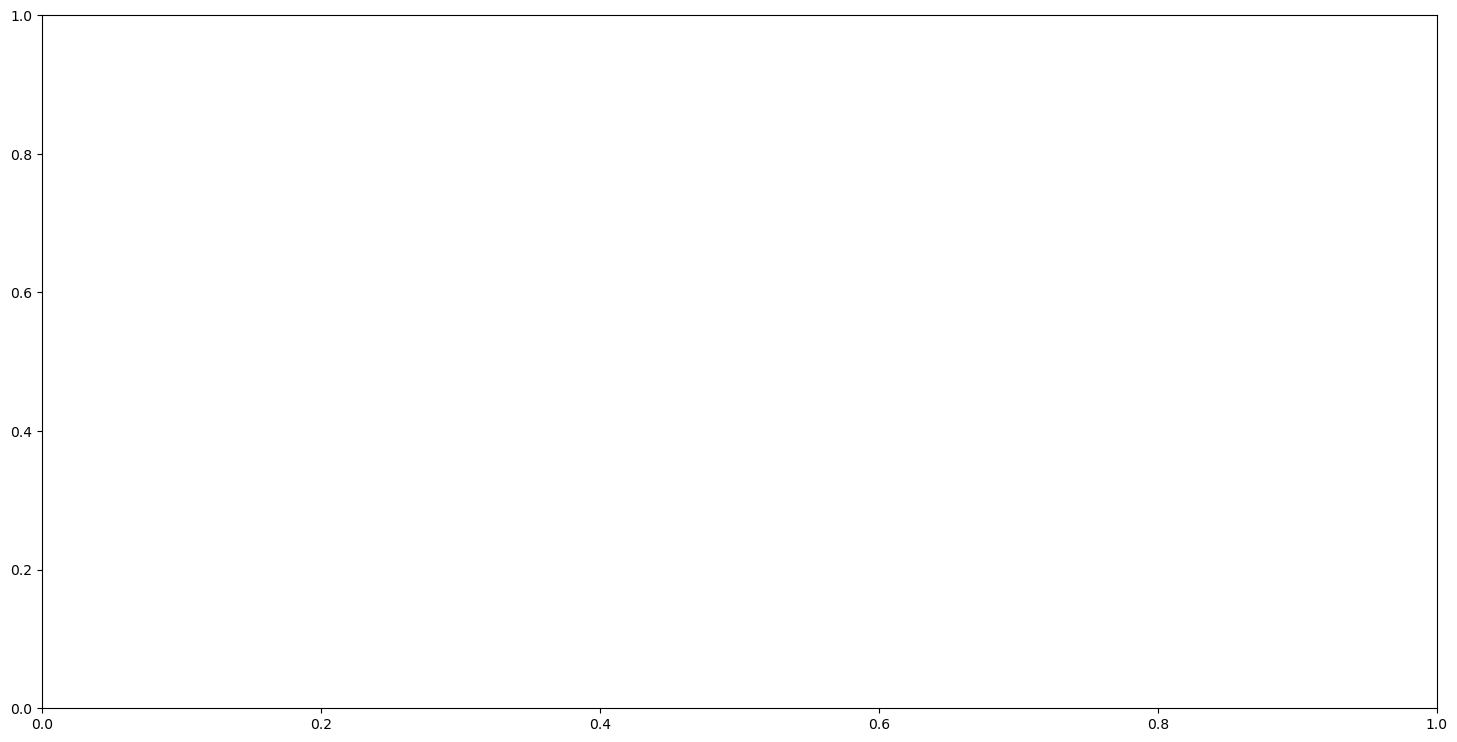

In [57]:
fig, ax = plt.subplots(figsize=(18, 9))
labels = clustering.labels_ 

for clust in range(0, len(labels) + 1):
    
    
    Xk = positions[labels == clust]
    
    
    
    
    
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c='blue', s=4, linewidths=0)
    
ax.scatter(positions[labels == -1, 0], positions[labels == -1, 1], s=4, c='w', linewidths=0)

plt.show()

In [18]:
newdir = directory + "\\Close Galaxy Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)
    
for clust in range(0, max(labels) + 1):
    Xk = positions[labels == clust] 
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) 
    
    
    clustername = 'Cheese'+ str(xcenter) +'Pizza'+ str(ycenter)+'Galaxy'  
    galaxnames = names[labels == clust] 
    with open(datapath + f'/Close Galaxy Clusters/{clustername}.csv', 'w') as file: 
        for name in galaxnames: 
            file.write(str(name)+'\n') 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 82 but corresponding boolean dimension is 55015

In [ ]:
distantdata = pd.read_csv(datapath + '/Distant Galaxy Data.csv')

distantequats = distantdata['Equatorial']   
distantpolars = distantdata['Polar']   

fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(distantequats, distantpolars, s=0.02, c='w')
ax.set_facecolor('k')
plt.show()  

In [ ]:
distantvels = distantdata['RadialVelocity']  

fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(distantequats, distantvels, distantpolars, s=0.5)
ax.set_xlim(0, 360); ax.set_zlim(0, 180); ax.invert_zaxis()
ax.set_xlabel("Equat"); ax.set_zlabel("Polar"); ax.set_ylabel("Velocity (km/s)")